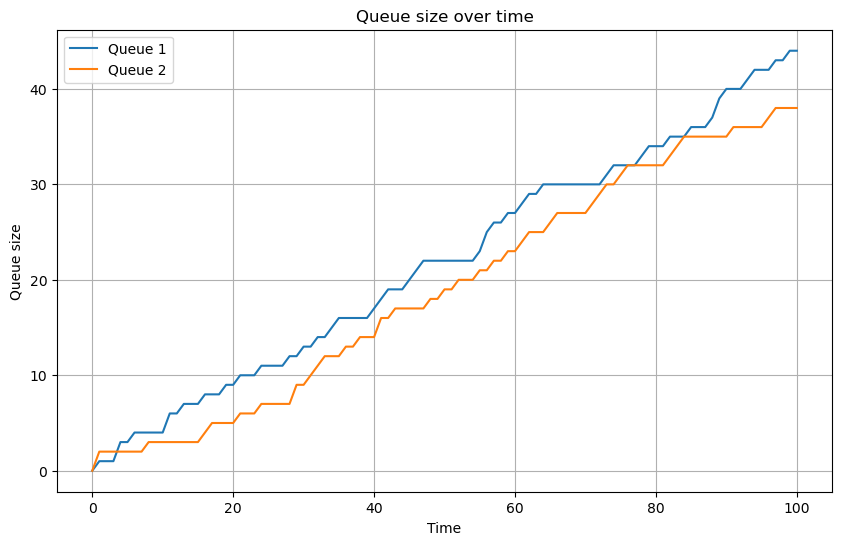

In [3]:
import numpy as np

# Initialize parameters
T = 100  # Number of time steps
lambda_1 = 0.5  # Arrival rate for queue 1
lambda_2 = 0.3  # Arrival rate for queue 2

# Initialize queues
Q1 = np.zeros(T+1)
Q2 = np.zeros(T+1)

# Simulate the system
for t in range(T):
    # Generate arrivals (according to a Poisson process)
    a1_t = np.random.poisson(lambda_1)
    a2_t = np.random.poisson(lambda_2)
    
    # Generate data transferred
    D1_t = np.random.randint(0, 1)  # Example: random data transferred for queue 1
    D2_t = np.random.randint(0, 1)  # Example: random data transferred for queue 2
    
    # Update queues
    Q1[t+1] = Q1[t] - D1_t + a1_t
    Q2[t+1] = Q2[t] - D2_t + a2_t

# Plotting the queues over time
import matplotlib.pyplot as plt

time = np.arange(T+1)

plt.figure(figsize=(10, 6))
plt.plot(time, Q1, label='Queue 1')
plt.plot(time, Q2, label='Queue 2')
plt.xlabel('Time')
plt.ylabel('Queue size')
plt.title('Queue size over time')
plt.legend()
plt.grid(True)
plt.show()
